<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/simulator1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

RISCA

In [ ]:
!rm -rf /content/SAR_ADC

In [ ]:
!apt-get -qq update
!apt-get -qq install ttf-mscorefonts-installer

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Preconfiguring packages ...
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2build2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2build2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-1build3_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-1build3) ...
Selecting previously unselected package xfonts-encodings.
Preparing to unpack .../03-xfonts-encodings_1%3a1.0.5-0ubuntu2_all.deb ...
Unpacking xfonts-encodings (1:1.0.5-0ubuntu2) ...
Selecting previously unselected

## Install Dependencies

In [1]:
%pip install numpy matplotlib seaborn pandas
!git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
import sys
sys.path.append('/content/SAR_ADC')

%cd SAR_ADC/script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx


Cloning into 'SAR_ADC'...
remote: Enumerating objects: 333, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (214/214), done.
remote: Total 333 (delta 191), reused 258 (delta 116), pack-reused 0 (from 0)
Receiving objects: 100% (333/333), 1.98 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/SAR_ADC


ModuleNotFoundError: No module named 'util'

## Initialize Configuration Information

In [ ]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input("sar/tisar/pipesar2s/nssar1o1c/nssar1o1ccp\n")
config_file_path = os.path.join("config",pr['conf_name'])
print(config_file_path)
pr_loaded = load_assembler_xlsx(config_file_path)
# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded Excel configuration:\n")
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

sar/tisar/pipesar2s/nssar1o1c/nssar1o1ccp
sar
../config/sar
Loading file: ../config/sar/timing_table.xlsx
[util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 1.0
[util.load_assembler_xlsx] parameter v_in_peak loaded: pr[v_in_peak]= 0.85
[util.load_assembler_xlsx] parameter f_in_center1 loaded: pr[f_in_center1]= 99000000.0
Loaded Excel configuration:



,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


## Input signal & Analysis conversion results

In [ ]:
# 定义输入信号峰值
v_in_peak = [pr["v_in_peak"], 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)
# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

## Run Analysis

offset_nocal = -7.82 LSB


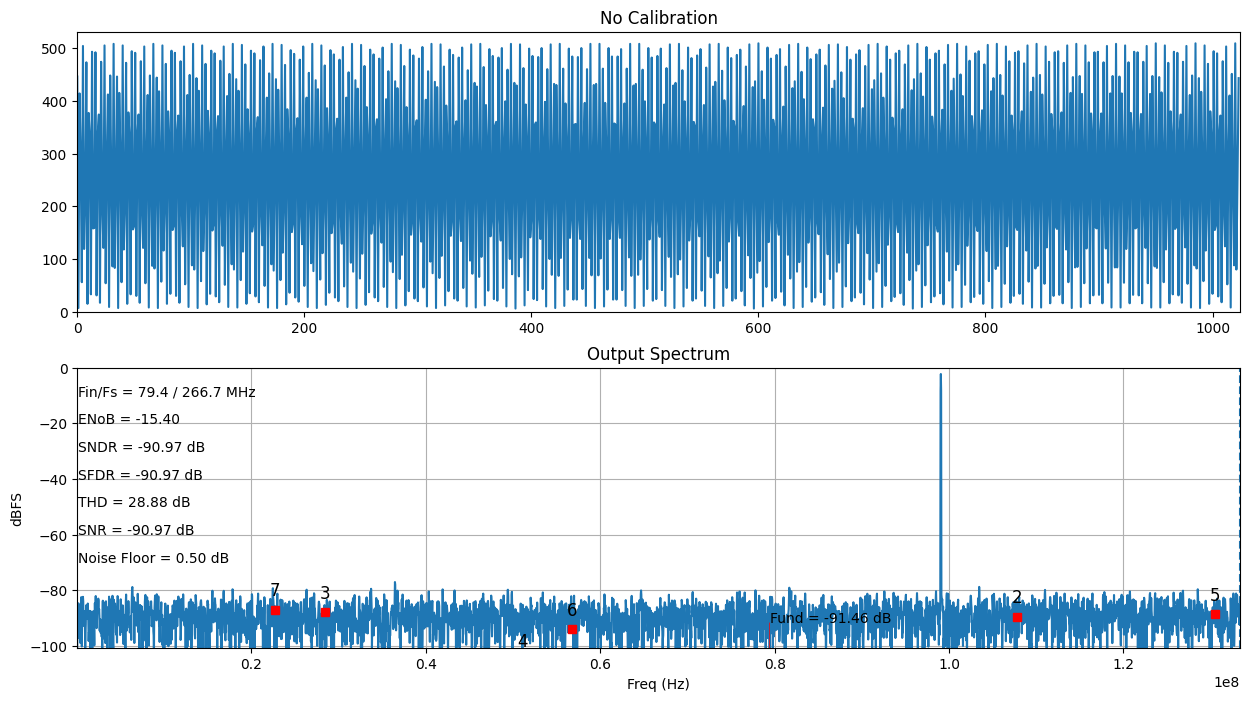

In [ ]:
test = Analyser(da, pr)
test.mode_analyser()